## Tutorial: Elasto-Plastic Model Demonstrations

### Example 1: Basic Isotropic Hardening with a Simple Strain Path
#### Description:
- This example initializes an isotropic hardening model.
- A simple strain path is generated.
- The model is loaded with this strain path.
- The stress-strain response is plotted.

In [1]:
# impoort modules
import numpy as np
import matplotlib.pyplot as plt
from algorithms.ElastoPlastic import ElastoPlastic, generate_strain_path

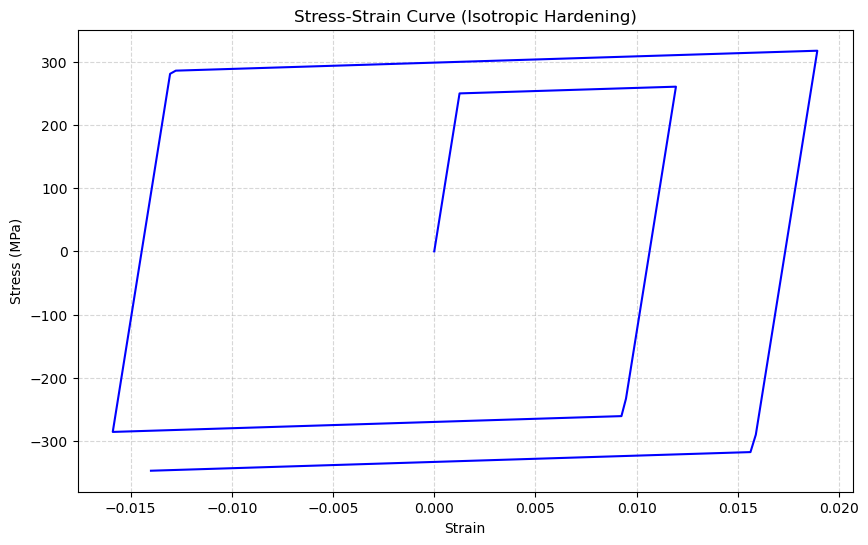

In [2]:
# Initialize the model
model = ElastoPlastic(E=200000, H=1000, Yi=250, mode='isotropic')

# Generate strain path
strain_path = generate_strain_path(max_strain=0.02, n_steps=500, plot=True)

# Apply loading
model.apply_loading(strain_path)

# Plot results
model.plot_curve("example_1.png")

### Example 2: Basic Kinematic Hardening with a Different Strain Path
#### Description:
- This example demonstrates kinematic hardening.
- A different strain path is used.
- The response is compared with the previous isotropic case.

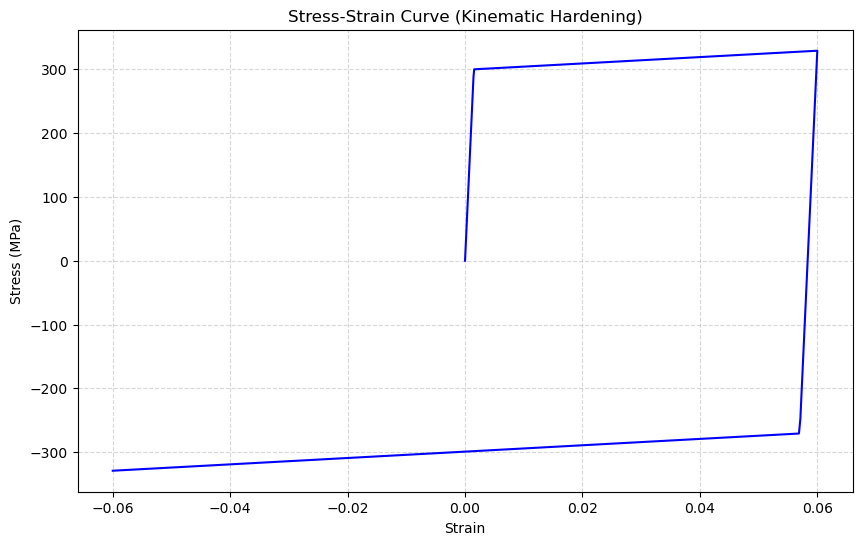

In [3]:
# Initialize model
model = ElastoPlastic(E=200000, H=500, Yi=300, mode='kinematic')

# Generate strain path
strain_path = np.concatenate([np.linspace(0, 0.06, 500), np.linspace(0.06, -0.06, 500)])

# Apply loading
model.apply_loading(strain_path)

# Plot results
model.plot_curve("example_2.png")

### Example 3: Extreme Loading with Kinematic Hardening
#### Description:
- This case tests a high strain loading scenario.
- Kinematic hardening is selected.
- The stress-strain curve behavior is analyzed.


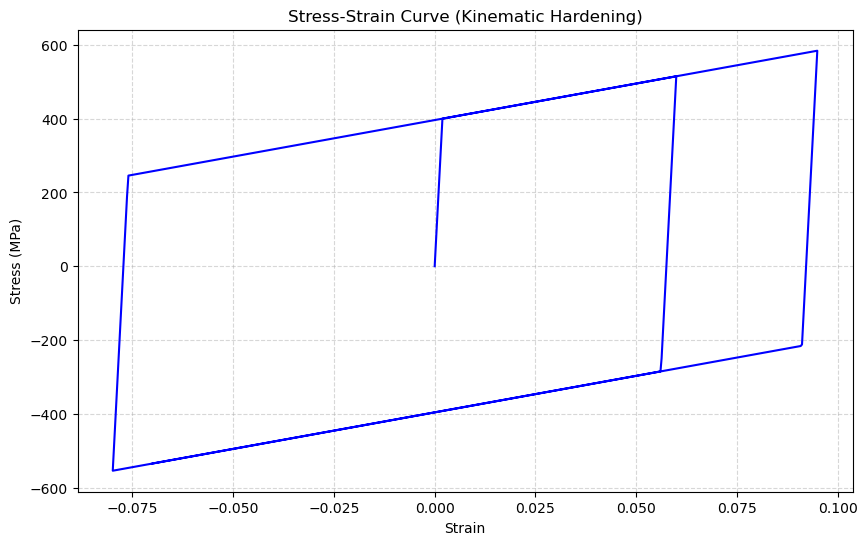

In [4]:
# Initialize model
model = ElastoPlastic(E=210000, H=2000, Yi=400, mode='kinematic')

# Generate strain path
strain_path = generate_strain_path(max_strain=0.1, n_steps=2000, plot=True)

# Apply loading
model.apply_loading(strain_path)

# Plot results
model.plot_curve("example_3.png")

## Example 4: Comparing Isotropic and Kinematic Hardening for the Same Loading
### Description:
- A single strain path is applied to both isotropic and kinematic models.
- The resulting stress-strain curves are compared.

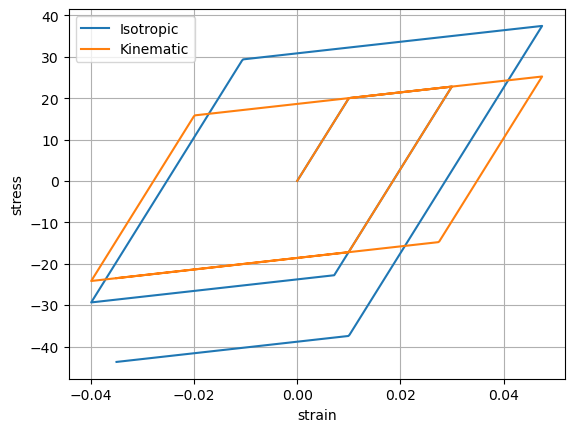

In [5]:
# Generate a common strain path
strain_path = generate_strain_path(max_strain=0.05, n_steps=1500, plot=True)

# Isotropic model
model_iso = ElastoPlastic(E=2000, H=150, Yi=20, mode='isotropic')
model_iso.apply_loading(strain_path)
iso_strain = model_iso.stress_history

# Kinematic model
model_kin = ElastoPlastic(E=2000, H=150, Yi=20, mode='kinematic')
model_kin.apply_loading(strain_path)
kin_strain = model_kin.stress_history

# plot
fig, ax = plt.subplots()
ax.plot(strain_path, iso_strain, label='Isotropic')
ax.plot(strain_path, kin_strain, label='Kinematic')
ax.grid()
ax.legend()
ax.set_xlabel('strain')
ax.set_ylabel('stress')
plt.show()

## Example 5: Near-Elastic Behavior with Low Hardening Modulus

### Description:
- Tests a model with very low hardening modulus.
- Observes behavior close to purely elastic response.

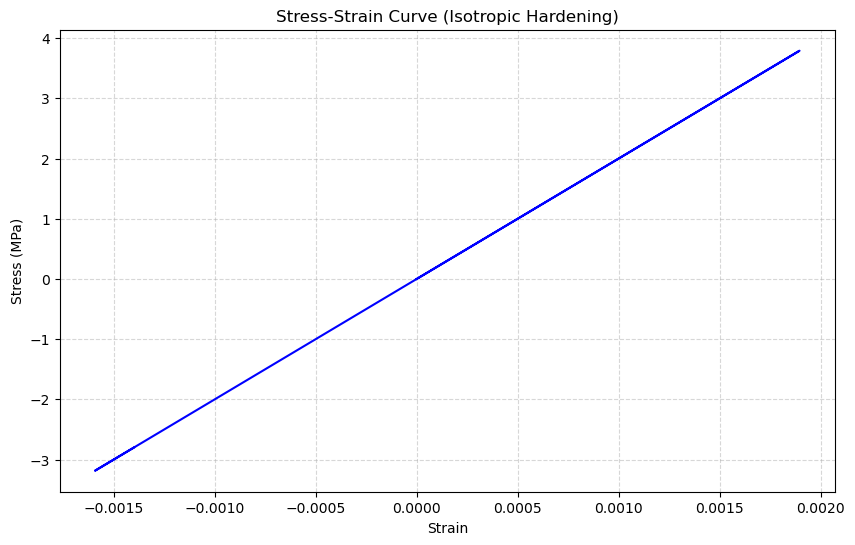

In [6]:
# Initialize model
model = ElastoPlastic(E=2000, H=100, Yi=200, mode='isotropic')

# Generate strain path
strain_path = generate_strain_path(max_strain=0.002, n_steps=750, plot=True)

# Apply loading
model.apply_loading(strain_path)

# Plot results
model.plot_curve("example_5.png")